# Curvas de temperatura calibrada
En este notebook se muestran los datos calibrados de difentes dias de observación, con los cuales se generan las curvas de temperatura del cielo.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from test import bandwidth

%matplotlib inline

In [87]:
freq, val, b = bandwidth(50.,90.)
col = np.arange(47)*10
data = pd.read_csv('dict_15.csv') # datos calibrados para el día 15
data.head()

,Unnamed: 0,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,...,mval_37,mval_38,mval_39,mval_40,mval_41,mval_42,mval_43,mval_44,mval_45,mval_46
0,0,2086.878967,2079.832535,3244.407194,1955.959414,2060.002103,1968.342027,30040.505487,3153.741631,2055.222339,...,-163555.039850,1971.710571,1996.585629,1968.905137,2021.849053,2082.914631,2091.264654,2041.824451,2048.108703,2092.350128
1,1,2094.709399,2127.667783,3535.657671,2070.567651,2044.793522,1988.307729,37531.403648,3481.714727,2097.623292,...,-111675.735024,2047.968408,2045.346929,2018.565390,2050.492045,2092.349507,2176.835938,2082.803478,2070.528683,2039.764346
2,2,2126.790180,2068.288424,3536.048839,2074.597692,2104.722327,2012.368511,38762.661708,3567.503748,2073.747270,...,-55602.898377,2076.984842,2024.677459,2053.180734,2046.882617,2103.183943,2154.837381,2079.993738,2141.010606,2065.649664
3,3,2078.207034,2055.892918,3642.527077,2086.627342,2114.592799,2030.207387,39784.805642,3628.881599,2107.208768,...,169996.412084,2075.252696,1982.540017,2046.747741,2101.808536,2141.395709,2116.694092,2109.808940,2120.856623,2037.874935
4,4,2019.919724,2092.544933,3563.781409,2042.892744,2076.837760,2033.666501,40641.861088,3614.536837,2155.864442,...,218367.939899,2035.270784,1957.297059,2061.945088,2104.621221,2108.402671,2117.074610,2123.734689,2049.514400,2011.097432


In [88]:
data.drop(data.columns[[0]],inplace=True, axis=1) #aquí se elimina la primera columna de la table anterior
mask = data > 0.0 #se quitan todos las temperaturas negativas
data = data[mask] # !
data.head()

,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,mval_ 9,...,mval_37,mval_38,mval_39,mval_40,mval_41,mval_42,mval_43,mval_44,mval_45,mval_46
0,2086.878967,2079.832535,3244.407194,1955.959414,2060.002103,1968.342027,30040.505487,3153.741631,2055.222339,357984.363269,...,NaN,1971.710571,1996.585629,1968.905137,2021.849053,2082.914631,2091.264654,2041.824451,2048.108703,2092.350128
1,2094.709399,2127.667783,3535.657671,2070.567651,2044.793522,1988.307729,37531.403648,3481.714727,2097.623292,NaN,...,NaN,2047.968408,2045.346929,2018.565390,2050.492045,2092.349507,2176.835938,2082.803478,2070.528683,2039.764346
2,2126.790180,2068.288424,3536.048839,2074.597692,2104.722327,2012.368511,38762.661708,3567.503748,2073.747270,NaN,...,NaN,2076.984842,2024.677459,2053.180734,2046.882617,2103.183943,2154.837381,2079.993738,2141.010606,2065.649664
3,2078.207034,2055.892918,3642.527077,2086.627342,2114.592799,2030.207387,39784.805642,3628.881599,2107.208768,NaN,...,169996.412084,2075.252696,1982.540017,2046.747741,2101.808536,2141.395709,2116.694092,2109.808940,2120.856623,2037.874935
4,2019.919724,2092.544933,3563.781409,2042.892744,2076.837760,2033.666501,40641.861088,3614.536837,2155.864442,189.160019,...,218367.939899,2035.270784,1957.297059,2061.945088,2104.621221,2108.402671,2117.074610,2123.734689,2049.514400,2011.097432


In [89]:
l_data = np.log10(data)
l_mask = (l_data < 5.0) & (l_data > 2.0)
l_data = l_data[l_mask] # !
l_data.head()

,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,mval_ 9,...,mval_37,mval_38,mval_39,mval_40,mval_41,mval_42,mval_43,mval_44,mval_45,mval_46
0,3.319497,3.318028,3.511135,3.291360,3.313868,3.294101,4.477707,3.498826,3.312859,NaN,...,NaN,3.294843,3.300288,3.294225,3.305749,3.318671,3.320409,3.310018,3.311353,3.320634
1,3.321124,3.327904,3.548470,3.316089,3.310649,3.298484,4.574395,3.541793,3.321727,NaN,...,NaN,3.311323,3.310767,3.305043,3.311858,3.320634,3.337826,3.318648,3.316081,3.309580
2,3.327725,3.315611,3.548518,3.316934,3.323195,3.303708,4.588414,3.552364,3.316756,NaN,...,NaN,3.317433,3.306356,3.312427,3.311093,3.322877,3.333415,3.318062,3.330619,3.315057
3,3.317689,3.313000,3.561403,3.319445,3.325227,3.307540,4.599717,3.559773,3.323708,NaN,...,NaN,3.317071,3.297222,3.311064,3.322593,3.330697,3.325658,3.324243,3.326511,3.309178
4,3.305334,3.320675,3.551911,3.310246,3.317403,3.308280,4.608974,3.558053,3.333621,2.276829,...,NaN,3.308622,3.291657,3.314277,3.323174,3.323954,3.325736,3.327100,3.311651,3.303433


In [90]:
data2 = pd.read_csv('dict_14.csv') #datos calibrados para el día 14
data2.drop(data2.columns[[0]],inplace=True, axis=1)
data2.head()

,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,mval_ 9,...,mval_90,mval_91,mval_92,mval_93,mval_94,mval_95,mval_96,mval_97,mval_98,mval_99
0,2493.291249,2555.324865,2755.755838,32116.638548,17037.100139,2542.068997,2373.608106,3563.424648,3745.844264,4068.767304,...,3547.009161,3706.754654,3648.200490,2069.944327,1817.511555,11134.616829,1886.224915,31098.183902,38725.141551,1743.707808
1,2481.816367,2539.904002,2882.493984,34733.641986,18424.375127,2553.649654,2433.230199,3782.527244,3930.751654,4133.837620,...,3626.662219,3825.475531,3769.658355,2054.075592,1799.355116,11592.605191,1847.731530,37599.281662,43905.242172,1806.002252
2,2460.622230,2530.559809,2963.284195,36863.225564,19707.514524,2695.343974,2521.795220,3843.088533,3909.050409,4108.725169,...,3574.006234,3895.244682,3901.815647,2121.453002,1846.071922,11579.315664,1874.811143,39121.769678,45797.737784,1807.031638
3,2426.737014,2514.559108,3032.358545,37860.538384,20246.205929,2711.757244,2551.537039,3849.637952,3751.600846,3980.680847,...,3545.700955,3898.730806,3929.332195,2176.693899,1917.699037,11374.008274,1937.037624,38805.037253,49713.512952,1796.262792
4,2442.749985,2498.440452,2997.775629,36706.732267,19728.119701,2510.453818,2498.402705,3837.280034,3855.022531,3964.116556,...,3543.005593,4023.437708,3824.809694,2129.375448,1866.324869,11022.080199,1877.872628,38244.212721,48926.217509,1859.057499


In [91]:
mask2 = data2 > 0.0
l_data2 = np.log10(data2)
l_data2.head()

,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,mval_ 9,...,mval_90,mval_91,mval_92,mval_93,mval_94,mval_95,mval_96,mval_97,mval_98,mval_99
0,3.396773,3.407446,3.440241,4.506730,4.231396,3.405187,3.375409,3.551868,3.573550,3.609463,...,3.549862,3.568994,3.562079,3.315959,3.259477,4.046675,3.275593,4.492735,4.587993,3.241474
1,3.394770,3.404817,3.459768,4.540750,4.265393,3.407161,3.386183,3.577782,3.594476,3.616353,...,3.559507,3.582685,3.576302,3.312616,3.255117,4.064181,3.266639,4.575180,4.642516,3.256718
2,3.391045,3.403217,3.471773,4.566593,4.294632,3.430614,3.401710,3.584680,3.592071,3.613707,...,3.553155,3.590535,3.591267,3.326633,3.266249,4.063683,3.272958,4.592418,4.660844,3.256966
3,3.385023,3.400462,3.481781,4.578187,4.306344,3.433251,3.406802,3.585420,3.574217,3.599957,...,3.549702,3.590923,3.594319,3.337797,3.282780,4.055914,3.287138,4.588888,4.696474,3.254370
4,3.387879,3.397669,3.476799,4.564746,4.295086,3.399752,3.397662,3.584023,3.586027,3.598146,...,3.549372,3.604597,3.582610,3.328252,3.270987,4.042264,3.273666,4.582566,4.689542,3.269293


In [92]:
l_mask2 = (l_data2 < 5.0) & (l_data2 > 2.0)
l_data2 = l_data2[l_mask2] # !
l_data2.head()

,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,mval_ 9,...,mval_90,mval_91,mval_92,mval_93,mval_94,mval_95,mval_96,mval_97,mval_98,mval_99
0,3.396773,3.407446,3.440241,4.506730,4.231396,3.405187,3.375409,3.551868,3.573550,3.609463,...,3.549862,3.568994,3.562079,3.315959,3.259477,4.046675,3.275593,4.492735,4.587993,3.241474
1,3.394770,3.404817,3.459768,4.540750,4.265393,3.407161,3.386183,3.577782,3.594476,3.616353,...,3.559507,3.582685,3.576302,3.312616,3.255117,4.064181,3.266639,4.575180,4.642516,3.256718
2,3.391045,3.403217,3.471773,4.566593,4.294632,3.430614,3.401710,3.584680,3.592071,3.613707,...,3.553155,3.590535,3.591267,3.326633,3.266249,4.063683,3.272958,4.592418,4.660844,3.256966
3,3.385023,3.400462,3.481781,4.578187,4.306344,3.433251,3.406802,3.585420,3.574217,3.599957,...,3.549702,3.590923,3.594319,3.337797,3.282780,4.055914,3.287138,4.588888,4.696474,3.254370
4,3.387879,3.397669,3.476799,4.564746,4.295086,3.399752,3.397662,3.584023,3.586027,3.598146,...,3.549372,3.604597,3.582610,3.328252,3.270987,4.042264,3.273666,4.582566,4.689542,3.269293


In [93]:
print(len(data.columns), len(data2.columns))

47 143


In [94]:
l_data.columns = col
frames = [l_data2, l_data]
l_data3 = pd.concat(frames, axis=1) #se genera una table con los datos del dia 14 y 15
l_data3.head()

,mval_ 0,mval_ 1,mval_ 2,mval_ 3,mval_ 4,mval_ 5,mval_ 6,mval_ 7,mval_ 8,mval_ 9,...,370,380,390,400,410,420,430,440,450,460
0,3.396773,3.407446,3.440241,4.506730,4.231396,3.405187,3.375409,3.551868,3.573550,3.609463,...,NaN,3.294843,3.300288,3.294225,3.305749,3.318671,3.320409,3.310018,3.311353,3.320634
1,3.394770,3.404817,3.459768,4.540750,4.265393,3.407161,3.386183,3.577782,3.594476,3.616353,...,NaN,3.311323,3.310767,3.305043,3.311858,3.320634,3.337826,3.318648,3.316081,3.309580
2,3.391045,3.403217,3.471773,4.566593,4.294632,3.430614,3.401710,3.584680,3.592071,3.613707,...,NaN,3.317433,3.306356,3.312427,3.311093,3.322877,3.333415,3.318062,3.330619,3.315057
3,3.385023,3.400462,3.481781,4.578187,4.306344,3.433251,3.406802,3.585420,3.574217,3.599957,...,NaN,3.317071,3.297222,3.311064,3.322593,3.330697,3.325658,3.324243,3.326511,3.309178
4,3.387879,3.397669,3.476799,4.564746,4.295086,3.399752,3.397662,3.584023,3.586027,3.598146,...,NaN,3.308622,3.291657,3.314277,3.323174,3.323954,3.325736,3.327100,3.311651,3.303433


In [95]:
print(np.shape(l_data3))

(5243, 190)


In [96]:
cols = np.arange(190)*10
inde = np.linspace(50, 90, 5243)

for i in range(len(inde)):
    inde[i] = round(inde[i], 2)

l_data3.columns = cols
l_data3.index = inde
l_data3.head()

,0,10,20,30,40,50,60,70,80,90,...,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890
50.00,3.396773,3.407446,3.440241,4.506730,4.231396,3.405187,3.375409,3.551868,3.573550,3.609463,...,NaN,3.294843,3.300288,3.294225,3.305749,3.318671,3.320409,3.310018,3.311353,3.320634
50.01,3.394770,3.404817,3.459768,4.540750,4.265393,3.407161,3.386183,3.577782,3.594476,3.616353,...,NaN,3.311323,3.310767,3.305043,3.311858,3.320634,3.337826,3.318648,3.316081,3.309580
50.02,3.391045,3.403217,3.471773,4.566593,4.294632,3.430614,3.401710,3.584680,3.592071,3.613707,...,NaN,3.317433,3.306356,3.312427,3.311093,3.322877,3.333415,3.318062,3.330619,3.315057
50.02,3.385023,3.400462,3.481781,4.578187,4.306344,3.433251,3.406802,3.585420,3.574217,3.599957,...,NaN,3.317071,3.297222,3.311064,3.322593,3.330697,3.325658,3.324243,3.326511,3.309178
50.03,3.387879,3.397669,3.476799,4.564746,4.295086,3.399752,3.397662,3.584023,3.586027,3.598146,...,NaN,3.308622,3.291657,3.314277,3.323174,3.323954,3.325736,3.327100,3.311651,3.303433


Text(33.0, 0.5, 'Frecuencia (MHz)')

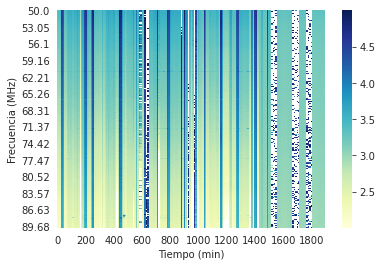

In [97]:
time = np.linspace(0,32,5)
fre = np.linspace(55,90,5)

fig1 = plt.figure()
sb.heatmap(l_data3, cmap='YlGnBu', xticklabels=20, yticklabels=400);
plt.xlabel('Tiempo (min)')
plt.ylabel('Frecuencia (MHz)')

A continuación se seleccionan intervalos de la figura anterior que muestran una transición suave en la temperatura

Text(33.0, 0.5, 'Frecuencia (MHz)')

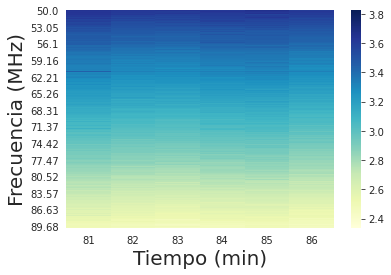

In [98]:
interval1 = pd.DataFrame(l_data3.values[:,81:87])
interval1.index = inde 
interval1.columns=np.arange(81,87)

fig2 = plt.figure()
sb.heatmap(interval1,cmap='YlGnBu',yticklabels=400);
plt.xlabel('Tiempo (min)', fontsize=20)
plt.ylabel('Frecuencia (MHz)',fontsize=20)

Text(33.0, 0.5, 'Frecuencia (MHz)')

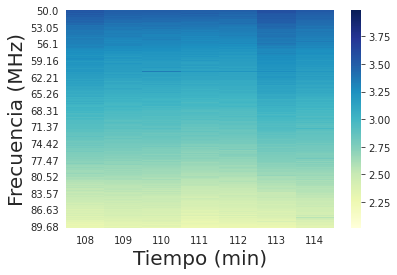

In [99]:
interval2 = pd.DataFrame(l_data3.values[:,108:115])
interval2.index = inde
interval2.columns=np.arange(108,115)

fig3 = plt.figure()
sb.heatmap(interval2,cmap='YlGnBu',yticklabels=400);
plt.xlabel('Tiempo (min)', fontsize=20)
plt.ylabel('Frecuencia (MHz)',fontsize=20)

In [101]:
space1= pd.DataFrame(l_data3.values[:,81:87])
space2 = pd.DataFrame(l_data3.values[:,108:115])

print(np.shape(space1))
print(np.shape(space2))

c_dim =  len(l_data3.columns)
print(c_dim)

(5243, 6)
(5243, 7)
190


In [102]:
l_data3.to_csv('c_temps.csv')
l_data3.head()

,0,10,20,30,40,50,60,70,80,90,...,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890
50.00,3.396773,3.407446,3.440241,4.506730,4.231396,3.405187,3.375409,3.551868,3.573550,3.609463,...,NaN,3.294843,3.300288,3.294225,3.305749,3.318671,3.320409,3.310018,3.311353,3.320634
50.01,3.394770,3.404817,3.459768,4.540750,4.265393,3.407161,3.386183,3.577782,3.594476,3.616353,...,NaN,3.311323,3.310767,3.305043,3.311858,3.320634,3.337826,3.318648,3.316081,3.309580
50.02,3.391045,3.403217,3.471773,4.566593,4.294632,3.430614,3.401710,3.584680,3.592071,3.613707,...,NaN,3.317433,3.306356,3.312427,3.311093,3.322877,3.333415,3.318062,3.330619,3.315057
50.02,3.385023,3.400462,3.481781,4.578187,4.306344,3.433251,3.406802,3.585420,3.574217,3.599957,...,NaN,3.317071,3.297222,3.311064,3.322593,3.330697,3.325658,3.324243,3.326511,3.309178
50.03,3.387879,3.397669,3.476799,4.564746,4.295086,3.399752,3.397662,3.584023,3.586027,3.598146,...,NaN,3.308622,3.291657,3.314277,3.323174,3.323954,3.325736,3.327100,3.311651,3.303433


Se hace un binning de 2 MHz para cada colunma de datos

In [103]:
print(np.shape(l_data3))

(5243, 190)


In [104]:
#se eliminan los NAN de la tabla
for j in range(190):
    for i in range(5243):
        if np.isnan(l_data3.values[i,j]) == True:
            l_data3.values[i,j] = 0.0

#Ancho de frecuencia para un binning de 2MHz
step = np.zeros(21)
for j in range(21):
    for i in range(len(inde)):
        if inde[i] == 50.00 + (2 * j):
            step[j] = i

# Checar la version en Github para la variable step

In [105]:
def bining(datos, shape, steps):
    """
    Generara un binning en las frecuncias para los datos especificamente estos datos
    steps: el indice para equvalente a 2 MHz en los datos
    """
    frame = pd.DataFrame()
    cell=np.zeros(20)
    for i in range(shape[1]):
        for j in range(20):
            cell[j]=np.mean(datos.values[int(steps[j]):int(steps[j+1]), i])
        frame.insert(i,'%3s'%str(i),cell)
    return frame

In [106]:
ds1 = bining(space1, np.shape(space1), step)
ds2 = bining(space2, np.shape(space2), step)

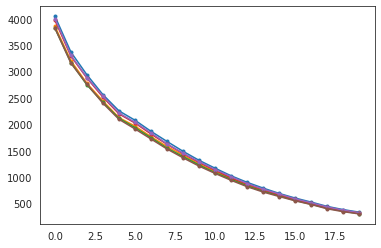

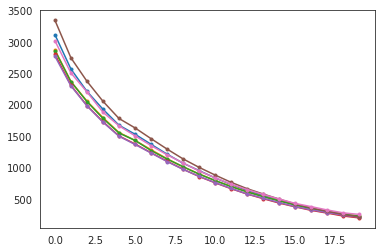

In [107]:
sb.set_style('white')

plt.figure()
for i in range(np.shape(ds1)[1]):
    plt.plot(10**ds1.values[:,i],'.-');

plt.figure()
for i in range(np.shape(ds2)[1]):
    plt.plot(10**ds2.values[:,i],'.-');

In [108]:
def bin_time(datos, shape):
    """
    Esta función hace un promedio para cada frecuencia en el tiempo.
    """
    vals = np.zeros(shape[0])
    for i in range(shape[0]):
        vals[i] = np.mean(datos.values[i,:])
    return vals

In [109]:
temp1 = bin_time(ds1, np.shape(ds1))
temp2 = bin_time(ds2, np.shape(ds2))

Text(0, 0.5, 'Temperatura (K)')

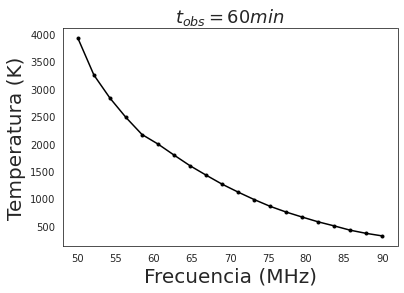

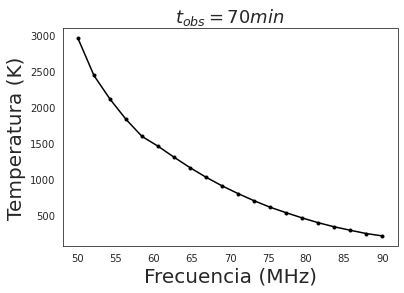

In [110]:
fig4 = plt.figure()
plt.title(r'$t_{obs} = 60  min$',fontsize=18)
plt.plot(np.linspace(50,90,len(temp1)),10**temp1,'.-k');
plt.xlabel('Frecuencia (MHz)', fontsize=20)
plt.ylabel('Temperatura (K)', fontsize=20)
fig5 = plt.figure()
plt.title(r'$t_{obs} = 70  min$',fontsize=18)
plt.plot(np.linspace(50,90,len(temp2)),10**temp2,'.-k');
plt.xlabel('Frecuencia (MHz)', fontsize=20)
plt.ylabel('Temperatura (K)', fontsize=20)

In [84]:
# np.savetxt('calibrated_data_1.txt', temp1) #freqs:50-90 MHz
# np.savetxt('calibrated_data_2.txt', temp2) #freqs:50-90 MHz